In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf

def tmnist_percentals(input_dir="datasets", max_count=29 ):
    labels = np.empty((0))
    images = np.empty((0, 32, 20,3))
    fontlabels = np.empty((0))
    
    # fonts in blacklist will be removed from dataset
    blacklist_url = input_dir + "/font-blacklist.txt"
    blacklist_data = pd.read_csv(blacklist_url, index_col=False)
    
    for i in range(max_count):

        dataset_url = input_dir + "/TMNIST_PERCENTAL_"+str((i+1)*1000)+"_Data.csv"
        data = pd.read_csv(dataset_url, index_col=False)
        data = data.drop(data[data['names'].isin(blacklist_data.values.reshape(-1))].index)
        labelfont = data[['names']] + '_' + data[['names']]
        y = data[['labels']]
        X = data.drop({'labels','names'},axis=1)

        # resizing needs a new shape
        X_images = (X.values.reshape(-1,28,28,1))
        
        # resize but not all for padding
        X_images = tf.image.resize(X_images, (32,20))
        
        # now pad to make a border (later white)
        # so it looks more like a meter digit
        #X_images = tf.image.resize_with_pad(X_images, 32, 20)
        
        # remove the shape for resizing
        X_images = np.array(X_images).reshape(-1,32,20)
        # gray to rgb (split in 3 channels)
        X_images = np.stack((X_images,)*3, axis=-1)
        
        images = np.concatenate((X_images, images))
        labels = np.concatenate((y.values.reshape(-1), labels))
        fontlabels = np.concatenate((labelfont.values.reshape(-1), fontlabels))
         
    return images, labels, fontlabels
x_tmnist, y_tmnist, f_tmnist = tmnist_percentals('../datasets')

In [46]:
import os
from PIL import Image

output_dir = '../datasets/tmnist'

for x, y, f in zip(x_tmnist, y_tmnist, f_tmnist):
    image = Image.fromarray(x.astype(np.uint8), mode='RGB')
    os.makedirs(os.path.join(output_dir, str(y)), exist_ok=True)
    image.save(os.path.join(output_dir, str(y)) + '/' + str(y) + '_' + f + '.jpg')

In [51]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

imgG = ImageDataGenerator()
ds = imgG.flow_from_directory(directory=output_dir, 
                                            target_size=(32,28), 
                                            color_mode='rgb',
                                            class_mode='categorical')

Found 279860 images belonging to 100 classes.


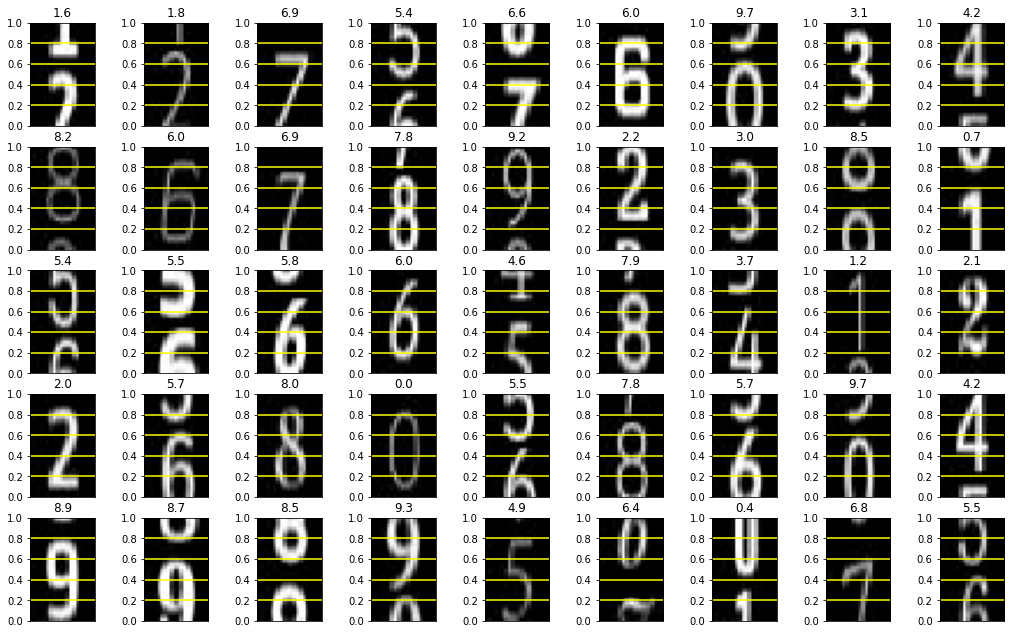

In [57]:
import matplotlib.pyplot as plt

def plot_dataset_it(data_iter, columns=9, rows=5):

    fig = plt.figure(figsize=(18, 11))
    
    for i in range(1, columns*rows +1):
        img, label = data_iter.next()
        fig.add_subplot(rows, columns, i)
        plt.xticks([0.2, 0.4, 0.6, 0.8])
        plt.title(np.argmax(label)/10)  # set title
        plt.imshow(img[0].astype(np.uint8), aspect='1.6', extent=[0, 1, 0, 1])
        ax=plt.gca()
        ax.get_xaxis().set_visible(False) 
        # yellow lines
        for y in np.arange(0.2, 0.8, 0.2):
                plt.axhline(y=y,color='yellow')
    plt.show()

plot_dataset_it(ds)